#### This script was originated from: job004f_plot_loadFromPickles_dey_scanOverAyy_NowakesVSwakes-Copy1.ipynb

In [3]:
import sys
sys.path.append('../../../utils/')
from cmptTheoreticalEmitGrowth import *
from bunchLengthConversions import *
from coordinatesConversions import *
from cmpt_TuneSpreads import *

import numpy as np
import pickle

import pandas as pd
import matplotlib.pyplot as plt

### Plotting parameters

In [4]:
params = {'legend.fontsize': 20,
          'figure.figsize': (9.5, 8.5),
          'axes.labelsize': 27,
          'axes.titlesize': 23,
          'xtick.labelsize': 27,
          'ytick.labelsize': 27,
          'image.cmap': 'jet',
          'lines.linewidth': 1,
          'lines.markersize': 10,
          'font.family': 'sans-serif'}

plt.rc('text', usetex=False)
plt.rc('font', family='serif')
plt.rcParams.update(params)

### Study parameters

In [5]:
n_sets = 20
n_turns = int(1e5)            # number of cycles to run the simulation for
decTurns = int(100)           # how often to record data
circumference  = 6911.5623 # [m]
f_rev  = 299792458/circumference  # [Hz] The revolution frequency of the machine 
separationTime = 1 / f_rev * decTurns #There are decTurns revolutions before each recording of data
tspan = (np.arange(n_turns / decTurns) + 1.0) * separationTime #total time spanned by the simulation

In [6]:
my_start = -2e4  
my_stop = 2.01e4 
my_step = 2000.0

my_variables = list(np.arange(my_start, my_stop, my_step))
#my_variables.insert(0,0.0)
print(my_variables)
print(len(my_variables))

[-20000.0, -18000.0, -16000.0, -14000.0, -12000.0, -10000.0, -8000.0, -6000.0, -4000.0, -2000.0, 0.0, 2000.0, 4000.0, 6000.0, 8000.0, 10000.0, 12000.0, 14000.0, 16000.0, 18000.0, 20000.0]
21


In [7]:
(pd.__version__)

'1.3.3'

### Load the data

In [8]:
path_to_data = './'
QpxQpy="1"
study_name = f'deyRates_updated_sps_270GeV_PN1e-8_400MHz_wakesOFFvsON_QpxQpy{QpxQpy}_6D_Nb5e5_turns1e5_4sigmat1_7ns_ayyScan' # title for save figures
study_name_1 = f'deyRates_updated_sps_270GeV_CC_PN_400MHz_wakesOFF_QpxQpy{QpxQpy}_6D_Nb5e5_turns1e5_4sigmat1_7ns_ayyScan'
#study_name_2 = f'deyRates_updated_sps_270GeV_CC_PN_400MHz_wakesON_QpxQpy{QpxQpy}_6D_Nb5e5_turns1e5_4sigmat1_7ns_ayyScan'
study_name_2 = f'deyRates_sps_200GeV_PN1e-8_400MHz_global_30deg_y-plane_WakesON_QpxQpy1_6D_Nb5e5_intensity3e10_ayyScan'
noise_type = 'PN'

my_df_1 = pickle.load( open(path_to_data+study_name_1+'.pkl', "rb" ))
my_df_2 = pickle.load( open(path_to_data+study_name_2+'.pkl', "rb" ) )

In [9]:
my_df_2

,ayy_-20000.0,ayy_-18000.0,ayy_-16000.0,ayy_-14000.0,ayy_-12000.0,ayy_-10000.0,ayy_-8000.0,ayy_-6000.0,ayy_-4000.0,ayy_-2000.0,...,ayy_2000.0,ayy_4000.0,ayy_6000.0,ayy_8000.0,ayy_10000.0,ayy_12000.0,ayy_14000.0,ayy_16000.0,ayy_18000.0,ayy_20000.0
m,"[1.766232041786721e-08, 1.8924031146653982e-08...","[1.7885017540886272e-08, 1.8836614909890195e-0...","[1.7555306629610408e-08, 1.867506998522095e-08...","[1.7017876643745378e-08, 1.840442096462675e-08...","[1.7447417672961954e-08, 1.8606608231701118e-0...","[1.7203609818827548e-08, 1.8534462365209572e-0...","[1.7232510159007085e-08, 1.7717558596656154e-0...","[1.727016103335861e-08, 1.6826569734607125e-08...","[1.7512575829327192e-08, 1.6762616175613444e-0...","[1.4497356502822493e-08, 1.510645128900383e-08...",...,"[1.2964149632319486e-08, 1.2013746317132644e-0...","[1.5302335617188245e-08, 1.4540751824637223e-0...","[1.663635619609683e-08, 1.8484481561635936e-08...","[1.8719096046802036e-08, 1.8939544423615222e-0...","[1.9045255844062007e-08, 1.841672657292491e-08...","[1.8614052092350957e-08, 1.890894272329951e-08...","[1.8407212005713474e-08, 1.8959863011161573e-0...","[1.8141904066490727e-08, 1.9029390149061017e-0...","[1.8270149943860793e-08, 1.8840401011085713e-0...","[1.8019942107480887e-08, 1.8889983668182404e-0..."
b,"[2.376288076267281e-06, 2.3772279910946846e-06...","[2.375985840480925e-06, 2.376990456711254e-06,...","[2.3779444908493885e-06, 2.3775548864937816e-0...","[2.3769965003848103e-06, 2.3769283073765726e-0...","[2.376186631062692e-06, 2.3753343410572636e-06...","[2.3806705853381104e-06, 2.3770537810837673e-0...","[2.37888409745757e-06, 2.3776010881940066e-06,...","[2.3802226735400543e-06, 2.3726939880027333e-0...","[2.3771276368721635e-06, 2.374148134325477e-06...","[2.380275496296097e-06, 2.375292782512558e-06,...",...,"[2.3779402608737277e-06, 2.3772089211292987e-0...","[2.379300468954915e-06, 2.3792833235688288e-06...","[2.376017874142065e-06, 2.377841285222001e-06,...","[2.376844837842844e-06, 2.3756775585000075e-06...","[2.3806858335143265e-06, 2.373158473779883e-06...","[2.3789511490297263e-06, 2.3797773289655244e-0...","[2.379678264929997e-06, 2.376924311464341e-06,...","[2.3792040795220036e-06, 2.3737312070601686e-0...","[2.377398245016935e-06, 2.376664070032308e-06,...","[2.37674200344148e-06, 2.3762758423870964e-06,..."
err,"[1.6338576699174547e-10, 1.6215995981229647e-1...","[1.6476873851529573e-10, 1.6540884542350818e-1...","[1.6783789499522489e-10, 1.6590673269634067e-1...","[1.703694443428512e-10, 1.681991896914901e-10,...","[1.740416257323812e-10, 1.7175636722601233e-10...","[1.788254100299216e-10, 1.7617193387682765e-10...","[1.814042099498121e-10, 1.7873555326725113e-10...","[1.8497123920725086e-10, 1.8229012623729106e-1...","[1.8794956255793449e-10, 1.901985276593204e-10...","[2.0700248228613217e-10, 2.0600691724181722e-1...",...,"[2.628597847676662e-10, 2.547484124371806e-10,...","[2.123506291695625e-10, 2.1410344890458576e-10...","[1.947862591009879e-10, 2.084589526839565e-10,...","[1.8171346160778162e-10, 1.876776343297358e-10...","[1.7447831042106734e-10, 1.741223411952365e-10...","[1.7039941666919157e-10, 1.7024689079450156e-1...","[1.7002216162029517e-10, 1.6677330146374885e-1...","[1.6940780208611604e-10, 1.6538599423749695e-1...","[1.6389819581561608e-10, 1.6281868640531172e-1...","[1.6314813300393857e-10, 1.6218047680530008e-1..."


In [10]:
my_df_keys = list(my_df_2.keys()) # same keys for both data Frames
print(my_df_keys)

['ayy_-20000.0', 'ayy_-18000.0', 'ayy_-16000.0', 'ayy_-14000.0', 'ayy_-12000.0', 'ayy_-10000.0', 'ayy_-8000.0', 'ayy_-6000.0', 'ayy_-4000.0', 'ayy_-2000.0', 'ayy_0.0', 'ayy_2000.0', 'ayy_4000.0', 'ayy_6000.0', 'ayy_8000.0', 'ayy_10000.0', 'ayy_12000.0', 'ayy_14000.0', 'ayy_16000.0', 'ayy_18000.0', 'ayy_20000.0']


### Compute error bars

Let's assume:

\begin{equation}
y_1 = a_1 x \pm err_1 \\
y_2 = a_2 x \pm err_2 \\
y_3 = a_3 x \pm err_3
\end{equation}

where $a_1, a_2, a_3$ is the growth rates obtained from a linear fit on the simulation data and $err_1, err_2, err_3$ the error of the linear fit. 


Then the systematic error is:
\begin{equation}
systematic \ error = std({a_1, a_2, a_3})
\end{equation}

and the statistical errors:
\begin{equation}
statistical \ error = \sqrt{\langle {err_1^2, err_2^2. err_3^2} \rangle} 
\end{equation}.

The total error is:

\begin{equation}
total \ error = \sqrt{(systematic \ error)^2 + (statistical \ error)^2}
\end{equation}

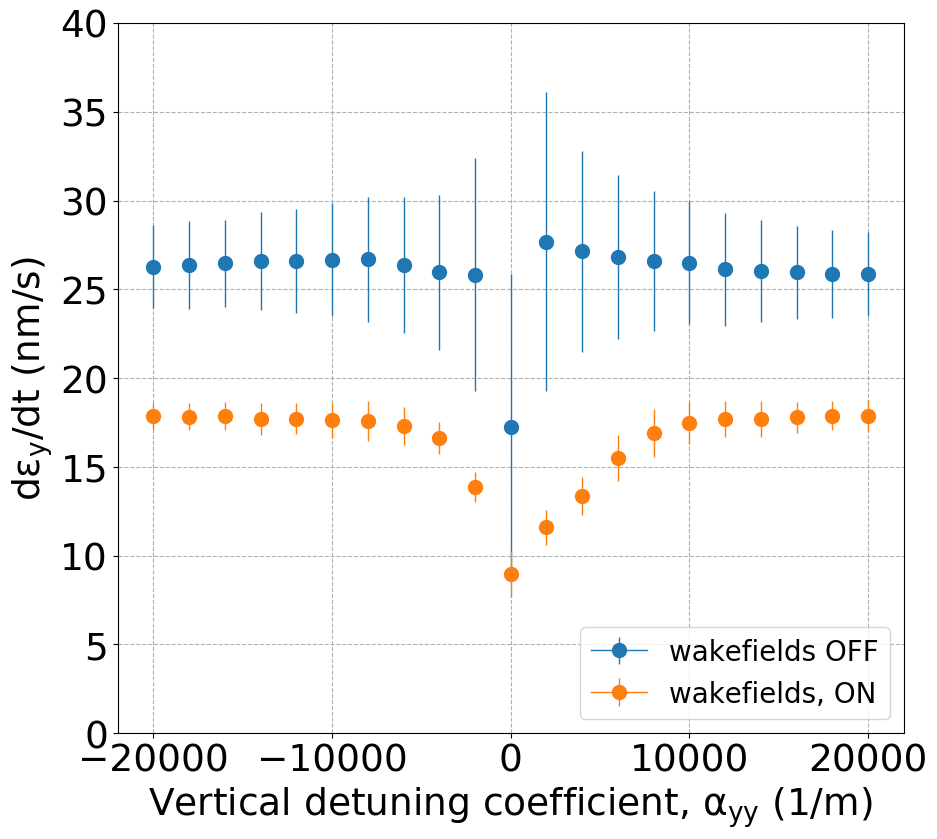

In [11]:
for i, key in enumerate(my_df_keys):
    
    if i ==0:
        my_label_1 = 'wakefields OFF'
        my_label_2 = 'wakefields, ON'
    else:
        my_label_1 = my_label_2 = ''
        
    # errors for study 1
    systematic_error_1 = np.std(my_df_1[my_df_keys[i]]['m'])
    statistical_error_1 = np.sqrt(np.mean(np.array(my_df_1[my_df_keys[i]]['err'])**2))
    total_error_1 = np.sqrt(systematic_error_1**2+statistical_error_1**2)
    
    # errors for study 2
    systematic_error_2 = np.std(my_df_2[my_df_keys[i]]['m'])
    statistical_error_2 = np.sqrt(np.mean(np.array(my_df_2[my_df_keys[i]]['err'])**2))
    total_error_2 = np.sqrt(systematic_error_2**2+statistical_error_2**2)
    
    
    plt.errorbar(my_variables[i], np.mean(my_df_1[my_df_keys[i]]['m'])*1e9, yerr=total_error_1*1e9, marker='o',  c='C0', label=my_label_1)
    plt.errorbar(my_variables[i], np.mean(my_df_2[my_df_keys[i]]['m'])*1e9, yerr=total_error_2*1e9, marker='o',  c='C1', label=my_label_2)
    
    
plt.legend(loc=4)

#plt.xlim(-200, 16000)
plt.ylim(0, 40)
plt.grid(linestyle='dashed')
plt.ylabel(r'$\mathrm{d\epsilon_y / dt \ (nm/s)}$')
plt.xlabel('Vertical detuning coefficient, '+r'$\mathrm{\alpha_{yy} \ (1/m)}$')


plt.tight_layout()

savefig = False
if savefig:
    plt.savefig(f'./figures/{study_name}.png', bbox_inches='tight')
plt.show()

### Compute the theoretically expected rate

In [12]:
# Machine parameters
betay = 73.81671646 # 73 m at CC2, 76 m at CC1
clight = 299792458 # m/s
Vcc = 1e6 # V
Eb = 200e9 # 270e9 eV
gamma_0 = 213.16 # for 200 GeV  # 287.8 for 270 GeV
beta_0 = np.sqrt(1 - 1/gamma_0**2)
circumference = 6911.5623 # m
frev = 299792458/circumference # Hz
tau = 2.2e-9 # 4 sigma_t [s] # 1.7e-9
sigma_z = clight*tau/4 #0.155  # m
print(f'sigma_z = {sigma_z} m')
f_CC = 400e6 # CC frequency in Hz

# Noise kick parameters
A_phase = 1e-8 # rms kick in the simulation of the phase noise
A_amplitude = 0 # rms kick in the simulation of the amplitude noise
scale_factor = Eb/Vcc # scaling factor to rms noise, σ
# Compute the PSD in rad^2/Hz and V^2/Hz
PSD_phi = (A_phase * scale_factor)**2/frev # rad^2/Hz
#PSD_phi = 1.42e-10
#PSD_phi = 1.4e-10
PSD_A = (A_amplitude * scale_factor)**2/frev # V^2/Hz
print(f'psd phi: {PSD_phi} rad^2/Hz, psd A: {PSD_A} V^2/Hz')

sigma_z = 0.1648858519 m
psd phi: 9.221796100020633e-11 rad^2/Hz, psd A: 0.0 V^2/Hz


In [13]:
# Compute the correction factor due to the bunch length
sigma_phi = bunch_length_m_to_rad(sigma_z, clight, f_CC)
CDeltaphi = cmpt_bunch_length_correction_factor(sigma_phi, 'PN')
CDeltaA = cmpt_bunch_length_correction_factor(sigma_phi, 'AN')
print('CDeltaPhi = {}, CDeltaA = {}'.format(CDeltaphi, CDeltaA))

if noise_type == 'PN':
    expected_growth = emit_growth_phase_noise(betay, Vcc, frev, Eb, CDeltaphi, PSD_phi, one_sided_psd=False)*beta_0*gamma_0 # m/s
    print(expected_growth)
    my_color = 'C0'
    fill_bewtween_color = 'lightblue'
elif noise_type == 'AN':
    expected_growth = emit_growth_amplitude_noise(betay, Vcc, frev, Eb, CDeltaA, PSD_A, one_sided_psd=False)*beta_0*gamma_0 # m/s
    my_color = 'C1'
    fill_bewtween_color = 'moccasin'
else:
    my_color = 'C2'
    expected_growth_1 = emit_growth_phase_noise(betay, Vcc, frev, Eb, CDeltaphi, PSD_phi, one_sided_psd=False)*beta_0*gamma_0 # m/s
    expected_growth_2 = emit_growth_amplitude_noise(betay, Vcc, frev, Eb, CDeltaA, PSD_A, one_sided_psd=False)*beta_0*gamma_0 # m/s
    expected_growth = expected_growth_1 + expected_growth_2

print('expected growth = {} nm/s'.format(expected_growth*1e9))

CDeltaPhi = 0.510947348428828, CDeltaA = 0.24452632578558595
1.7435976910472817e-08
expected growth = 17.435976910472817 nm/s


In [14]:
for i, key in enumerate(my_df_keys):
    
    if i ==0:
        my_label_1 = 'wakefields OFF'
        my_label_2 = 'wakefields, ON'
    else:
        my_label_1 = my_label_2 = ''
        
    # errors for study 1
    systematic_error_1 = np.std(my_df_1[my_df_keys[i]]['m'])
    statistical_error_1 = np.sqrt(np.mean(np.array(my_df_1[my_df_keys[i]]['err'])**2))
    total_error_1 = np.sqrt(systematic_error_1**2+statistical_error_1**2)
    
    # errors for study 2
    systematic_error_2 = np.std(my_df_2[my_df_keys[i]]['m'])
    statistical_error_2 = np.sqrt(np.mean(np.array(my_df_2[my_df_keys[i]]['err'])**2))
    total_error_2 = np.sqrt(systematic_error_2**2+statistical_error_2**2)
    
    
    plt.errorbar(my_variables[i], np.mean(my_df_1[my_df_keys[i]]['m'])*1e9, yerr=total_error_1*1e9, marker='o',  c='C0', label=my_label_1)
    plt.errorbar(my_variables[i], np.mean(my_df_2[my_df_keys[i]]['m'])*1e9, yerr=total_error_2*1e9, marker='o',  c='C1', label=my_label_2)
    

plt.hlines(expected_growth*1e9, -22000., 22000., linestyles='dashed', linewidth=3, color='k', label=f'theoretical growth = {expected_growth*1e9:.2f} nm/s')

plt.legend(loc=3)

plt.xlim(-21000, 21000)
plt.ylim(0, 40)

plt.grid(linestyle='dashed')
plt.ylabel(r'$\mathrm{d\epsilon_y / dt \ (nm/s)}$')
plt.xlabel('Vertical detuning coefficient, '+r'$\mathrm{\alpha_{yy} \ (1/m)}$')


plt.tight_layout()

savefig = False
if savefig:
    plt.savefig(f'./figures/{study_name}_vs_Theory.png', bbox_inches='tight')

### Compute the rms detuning with amplitude

In [15]:
#Load the bunch, you need to activate a Pyheadtail version v1.13 or newer
path_to_bunch = '/afs/cern.ch/work/n/natriant/private/pyheadtail_example_crabcavity/'
path_to_bunch='./'
bunch = pickle.load(open(path_to_bunch+'bunch_IPAC', 'rb')) # you need to activate an environment with pyhedtail version at least v1.13.5

PyHEADTAIL v1.13.5




In [16]:
# Optics at CC2
beta_y = 73.81671646
beta_x = 30.31164764
alpha_y = 0
alpha_x = 0

# Coordinates
x, px = bunch.x, bunch.xp
y, py =  bunch.y, bunch.yp

# Normalised coordinates 
x_n, px_n = cmpt_normalised_coordinates(x, px, beta_x, alpha_x)
y_n, py_n = cmpt_normalised_coordinates(y, py, beta_y, alpha_y)


# Compute actions
Jx_init = cmpt_actions(x_n, px_n)
Jy_init = cmpt_actions(y_n, py_n)

rms_Jx_init = np.std(Jx_init)
rms_Jy_init = np.std(Jy_init)

print(f'rms(Jx)={rms_Jx_init} m')
print(f'rms(Jy)={rms_Jy_init} m')

rms(Jx)=7.98866664187745e-09 m
rms(Jy)=7.97627199081245e-09 m


In [17]:
Dqy_rms = []
axy=0
for ayy in my_variables:
    Dqy_rms.append(rms_amplitude_detuning_y(Jy_init, Jx_init, ayy, axy))

In [18]:
fig, ax = plt.subplots(1,1)

ax2 = ax.twiny()

points_wakes = []
points_no_wakes = []


for i, key in enumerate(my_df_keys):
    
    if i ==0:
        my_label_1 = 'Wakefields OFF'
        my_label_2 = 'Wakefields ON'
    else:
        my_label_1 = my_label_2 = ''
        
    # errors for study 1
    systematic_error_1 = np.std(my_df_1[my_df_keys[i]]['m'])
    statistical_error_1 = np.sqrt(np.mean(np.array(my_df_1[my_df_keys[i]]['err'])**2))
    total_error_1 = np.sqrt(systematic_error_1**2+statistical_error_1**2)
    
    # errors for study 2
    systematic_error_2 = np.std(my_df_2[my_df_keys[i]]['m'])
    statistical_error_2 = np.sqrt(np.mean(np.array(my_df_2[my_df_keys[i]]['err'])**2))
    total_error_2 = np.sqrt(systematic_error_2**2+statistical_error_2**2)
    
    
    ax.errorbar(my_variables[i], np.mean(my_df_1[my_df_keys[i]]['m'])*1e9, yerr=total_error_1*1e9, marker='o',  c='C0', label=my_label_1)
    ax.errorbar(my_variables[i], np.mean(my_df_2[my_df_keys[i]]['m'])*1e9, yerr=total_error_2*1e9, marker='o',  c='C1', label=my_label_2)
    
    points_no_wakes.append(np.mean(my_df_1[my_df_keys[i]]['m'])*1e9)
    points_wakes.append(np.mean(my_df_2[my_df_keys[i]]['m'])*1e9)
    
    
    ax2.plot(np.array(Dqy_rms[i])*1e4, np.mean(my_df_1[my_df_keys[i]]['m'])*1e9, linestyle='')
    ax2.plot(-np.array(Dqy_rms[i])*1e4, np.mean(my_df_1[my_df_keys[i]]['m'])*1e9, linestyle='')


ax.plot(my_variables, points_no_wakes, c='C0')
ax.plot(my_variables, points_wakes, c='C1')
    
ax.hlines(expected_growth*1e9, -22000, 22000, linestyles='dashed', linewidth=3, color='k', label=f'theoretical growth = {expected_growth*1e9:.2f} nm/s')
ax.legend(loc=2)

#ax2.set_xlim(-3*21000*rms_Jy_init*1e4, 3*21000*rms_Jy_init*1e4)
ax2.set_xlim(-np.max(Dqy_rms)-21000*2*rms_Jy_init*1e4, np.max(Dqy_rms)+21000*2*rms_Jy_init*1e4 )
ax.set_xlim(-21000, 21000)


labels = ax.get_xticks()
#ax2.set_xticklabels(abs(labels*1e-4))

ax.set_ylim(0, 40)

ax.grid(linestyle='dashed')

ax.set_ylabel(r'$\mathrm{\langle d\epsilon_y / dt \rangle \ [nm/s]}$')
ax.set_xlabel('Detuning coefficient, '+r'$\mathrm{\alpha_{yy} \ [1/m]}$')
ax.ticklabel_format(axis='x', style='sci', scilimits=(4,4))


ax2.set_xlabel(r'$\mathrm{rms(\Delta Q_y) \cdot 10^{-4}}$', y=15)
plt.tight_layout()

savefig = False
if savefig:
    plt.savefig(f'./figures/{study_name}_vs_TuneSpread_v2.png', bbox_inches='tight')

### Plot expected rms amplitude detuning of SPS for the current settings
- b3b5b7 included 
- chroma match at the current setting (contribution from the chromatic sextupoles)
- klof=klod=1 $1/m^4$
- axy and ayy values as shown below are obtained from MAD-X
    link to script: https://github.com/natriant/exploring_SPS/blob/master/coherent_and_incoherent_tuneShift/job000_cmpt_SPS_detuning_ceofficients_madx.ipynb

In [19]:
if QpxQpy == "0":  
    axy_sps = -1484.124066 # for Qpx=Qpy=0
    ayy_sps = 1082.073444 # for Qpx=Qpy=0
elif QpxQpy == "5e-1":  
    axy_sps = -1497.189826 # for Qpx=Qpy=0.5
    ayy_sps = 1081.203394 # for Qpx=Qpy=0.5
elif  QpxQpy == "1":  
    axy_sps = -1510.465536 # for Qpx=Qpy=1
    ayy_sps = 1080.331794 # for Qpx=Qpy=1
elif QpxQpy=="25e-1":
    axy_sps= -1551.55237 # for Qpx=Qpy=2.5
    ayy_sps = 1077.707686 # for Qpx=Qpy=2.5
elif QpxQpy=="5":
    axy_sps = -1624.229435 # for Qpx=Qpy=5
    ayy_sps = 1073.303156 # for Qpx=Qpy=5
print(axy_sps, ayy_sps)

-1510.465536 1080.331794


In [20]:
Dqy_rms_sps = rms_amplitude_detuning_y(Jy_init, Jx_init, ayy_sps, axy_sps)
print(Dqy_rms_sps)

2.9640208780655305e-05


In [21]:
fig, ax = plt.subplots(1,1)

ax2 = ax.twiny()

points_wakes = []
points_no_wakes = []


for i, key in enumerate(my_df_keys):
    
    # errors for study 1
    systematic_error_1 = np.std(my_df_1[my_df_keys[i]]['m'])
    statistical_error_1 = np.sqrt(np.mean(np.array(my_df_1[my_df_keys[i]]['err'])**2))
    total_error_1 = np.sqrt(systematic_error_1**2+statistical_error_1**2)
    
    # errors for study 2
    systematic_error_2 = np.std(my_df_2[my_df_keys[i]]['m'])
    statistical_error_2 = np.sqrt(np.mean(np.array(my_df_2[my_df_keys[i]]['err'])**2))
    total_error_2 = np.sqrt(systematic_error_2**2+statistical_error_2**2)
    
    if i == 0:
        err1 = ax.errorbar(my_variables[i], np.mean(my_df_1[my_df_keys[i]]['m'])*1e9, yerr=total_error_1*1e9, marker='o',  c='C0', label='Wakefields OFF')
        err2 = ax.errorbar(my_variables[i], np.mean(my_df_2[my_df_keys[i]]['m'])*1e9, yerr=total_error_2*1e9, marker='o',  c='C1', label='Wakefields ON')
    else:
        ax.errorbar(my_variables[i], np.mean(my_df_1[my_df_keys[i]]['m'])*1e9, yerr=total_error_1*1e9, marker='o',  c='C0')
        ax.errorbar(my_variables[i], np.mean(my_df_2[my_df_keys[i]]['m'])*1e9, yerr=total_error_2*1e9, marker='o',  c='C1')
        
    points_no_wakes.append(np.mean(my_df_1[my_df_keys[i]]['m'])*1e9)
    points_wakes.append(np.mean(my_df_2[my_df_keys[i]]['m'])*1e9)
    
    
    ax2.plot(np.array(Dqy_rms[i])*1e4, np.mean(my_df_1[my_df_keys[i]]['m'])*1e9, linestyle='')
    ax2.plot(-np.array(Dqy_rms[i])*1e4, np.mean(my_df_1[my_df_keys[i]]['m'])*1e9, linestyle='')


ax.plot(my_variables, points_no_wakes, c='C0')
ax.plot(my_variables, points_wakes, c='C1')
    
theory = ax.hlines(expected_growth*1e9, -22000, 22000, linestyles='dashed', linewidth=3, color='k', label=f'Analytical model: {expected_growth*1e9:.2f} nm/s')

ax2.set_xlim(-np.max(Dqy_rms)-21000*2*rms_Jy_init*1e4, np.max(Dqy_rms)+21000*2*rms_Jy_init*1e4 )
ax.set_xlim(-21000, 21000)

ax2.axvspan(-Dqy_rms_sps*1e4 , Dqy_rms_sps*1e4, alpha=0.2, color='grey', label='SPS CC tests')

ax2.set_xlim(-np.max(Dqy_rms)-21000*2*rms_Jy_init*1e4, np.max(Dqy_rms)+21000*2*rms_Jy_init*1e4 )


labels = ax.get_xticks()


ax.set_yticks(np.arange(0,45,5))
ax2.set_xticks(np.arange(-3, 4,1))
ax2.set_xticklabels(np.abs((np.arange(-3, 4,1))))

ax.set_ylim(-1, 40)

ax.grid(linestyle='dashed')

ax.set_ylabel(r'$\mathrm{\langle d\epsilon_y / dt \rangle \ [nm/s]}$')
ax.set_xlabel('Detuning coefficient, '+r'$\mathrm{\alpha_{yy} \ [1/m]}$')
ax.ticklabel_format(axis='x', style='sci', scilimits=(4,4))

ax2.set_xlabel(r'$\mathrm{rms(\Delta Q_y) \cdot 10^{-4}}$', y=15)
plt.tight_layout()


# legends
ax.legend(loc=3, frameon=False, handles=[err1, err2, theory]) # for CC PN
#ax.legend(loc=3, frameon=False, handles=[err1, err2]) # for dipolar noise

ax2.legend(bbox_to_anchor=(0., 0.1, 0.6, 0.3), frameon=False, loc='center left') # for CC PN
#ax2.legend(bbox_to_anchor=(0., 0.01, 0.6, 0.23), frameon=False) # for dipolar noise

savefig = False
if savefig:
    plt.savefig(f'./figures/{study_name}_vs_TuneSpreadvsExpectedSPS.png', bbox_inches='tight')

## Part B:  Octupole settings

Methodology:
- With MAD-X (path 2 script:) we match the octupoles to the desired ayy values, x-axis in the figure above.
- Matching output: The klof and klod values required to achieve the targeted ayy values.
- From the klof and klod values we compute the required current, I_klof and I_klod respectively. (https://www.overleaf.com/read/bsxyppwxyvfd)



Color code explained:
- green: I_klof AND I_klod <= 100 A
- yellow: (I_klof OR I_klod > 100 A) AND (I_klof AND I_klod <= 200 A)
- red: I_klof or I_klod > 200 A

In [22]:
path2octupoles_matching_data  = '/home/natalia/PhD_projects/exploring_SPS/match_octupoles/'
my_study= 'summary_QpxQpy1_b3b5b7_270GeV_ayyScan_axyNoConstraint_LOD.pkl'

In [23]:
octupole_settings = pickle.load(open(path2octupoles_matching_data+my_study, 'rb'))
octupole_settings

,ayy [1/m],axy [1/m],klof [1/m^4],klod [1/m^4],O3_lof [T/m^3],O3_lod [T/m^3],I_lof [A],I_lod [A]
0,-2.000000e+04,9531.997032,0.0,-18.772020,0.0,-16906.513922,0.0,-169.065139
1,-1.600000e+04,7534.654887,0.0,-15.008035,0.0,-13516.582304,0.0,-135.165823
2,-1.200000e+04,5537.312742,0.0,-11.244050,0.0,-10126.650686,0.0,-101.266507
3,-8.000000e+03,3539.970598,0.0,-7.480065,0.0,-6736.719068,0.0,-67.367191
4,-4.000000e+03,1542.628453,0.0,-3.716080,0.0,-3346.787450,0.0,-33.467875
5,-2.000000e+03,543.957381,0.0,-1.834088,0.0,-1651.821641,0.0,-16.518216
6,-6.000000e+03,2541.299525,0.0,-5.598073,0.0,-5041.753259,0.0,-50.417533
7,-1.000000e+04,4538.641670,0.0,-9.362058,0.0,-8431.684877,0.0,-84.316849
8,-1.400000e+04,6535.983815,0.0,-13.126042,0.0,-11821.616495,0.0,-118.216165
9,-1.800000e+04,8533.325959,0.0,-16.890027,0.0,-15211.548113,0.0,-152.115481


In [24]:
octupole_settings_key_list = octupole_settings.keys()
octupole_settings_key_list

Index(['ayy [1/m]', 'axy [1/m]', 'klof [1/m^4]', 'klod [1/m^4]',
       'O3_lof [T/m^3]', 'O3_lod [T/m^3]', 'I_lof [A]', 'I_lod [A]'],
      dtype='object')

In [25]:
green_list, yellow_list, red_list = [], [], []
indeces = [] # for sanity checks
for i in range(len(octupole_settings['ayy [1/m]'])):
    if np.abs(octupole_settings['I_lof [A]'][i]) <= 100 and np.abs(octupole_settings['I_lod [A]'][i]) <= 100:
        green_list.append(octupole_settings['ayy [1/m]'][i])
    #elif (np.abs(I_klof[i]) <= 200 and np.abs(I_klod[i]) <=200): #and (np.abs(I_klof[i]) > 100 or np.abs(I_klod[i]) <= 100):
    elif (np.abs(octupole_settings['I_lof [A]'][i]) > 100 or np.abs(octupole_settings['I_lod [A]'][i]) > 100) and (np.abs(octupole_settings['I_lof [A]'][i]) <= 200 and np.abs(octupole_settings['I_lod [A]'][i]) <=200) :
        yellow_list.append(octupole_settings['ayy [1/m]'][i])
        indeces.append(i) # for sanity checks
    elif (np.abs(octupole_settings['I_lof [A]'][i]) > 200) or (np.abs(octupole_settings['I_lod [A]'][i]) > 200):
        red_list.append(octupole_settings['ayy [1/m]'][i])
    else:
        print(f'Something went wrong {i}')

In [26]:
Dqy_rms_new = rms_amplitude_detuning_y(Jy_init, Jx_init, np.array(octupole_settings['ayy [1/m]']), np.array(octupole_settings['axy [1/m]']))
print(Dqy_rms_new)

[3.53881610e-04 2.82484944e-04 2.11098463e-04 1.39737775e-04
 6.84835621e-05 3.31119282e-05 1.04083686e-04 1.75412927e-04
 2.46789878e-04 3.18182433e-04 7.25384017e-06 3.94797858e-05
 7.49300051e-05 1.10544899e-04 1.46204175e-04 1.81881730e-04
 2.17568571e-04 2.53260774e-04 2.88956352e-04 3.24654191e-04
 3.60353619e-04]


In [27]:
fig, ax = plt.subplots(1,1)

ax2 = ax.twiny()

points_wakes = []
points_no_wakes = []


for i, key in enumerate(my_df_keys):
    
    # errors for study 1
    systematic_error_1 = np.std(my_df_1[my_df_keys[i]]['m'])
    statistical_error_1 = np.sqrt(np.mean(np.array(my_df_1[my_df_keys[i]]['err'])**2))
    total_error_1 = np.sqrt(systematic_error_1**2+statistical_error_1**2)
    
    # errors for study 2
    systematic_error_2 = np.std(my_df_2[my_df_keys[i]]['m'])
    statistical_error_2 = np.sqrt(np.mean(np.array(my_df_2[my_df_keys[i]]['err'])**2))
    total_error_2 = np.sqrt(systematic_error_2**2+statistical_error_2**2)
    
    if i == 0:
        err1 = ax.errorbar(my_variables[i], np.mean(my_df_1[my_df_keys[i]]['m'])*1e9, yerr=total_error_1*1e9, marker='o', capsize=5, c='C0', label='Wakefields OFF')
        err2 = ax.errorbar(my_variables[i], np.mean(my_df_2[my_df_keys[i]]['m'])*1e9, yerr=total_error_2*1e9, marker='o', capsize=5, c='C1', label='Wakefields ON')
    else:
        ax.errorbar(my_variables[i], np.mean(my_df_1[my_df_keys[i]]['m'])*1e9, yerr=total_error_1*1e9, marker='o', capsize=5, c='C0')
        ax.errorbar(my_variables[i], np.mean(my_df_2[my_df_keys[i]]['m'])*1e9, yerr=total_error_2*1e9, marker='o', capsize=5, c='C1')
        
    points_no_wakes.append(np.mean(my_df_1[my_df_keys[i]]['m'])*1e9)
    points_wakes.append(np.mean(my_df_2[my_df_keys[i]]['m'])*1e9)
    
    
    ax2.plot(np.array(Dqy_rms_new[i])*1e4, np.mean(my_df_1[my_df_keys[i]]['m'])*1e9, linestyle='')
    ax2.plot(-np.array(Dqy_rms_new[i])*1e4, np.mean(my_df_1[my_df_keys[i]]['m'])*1e9, linestyle='')


ax.plot(my_variables, points_no_wakes, c='C0')
ax.plot(my_variables, points_wakes, c='C1')
    
theory = ax.hlines(expected_growth*1e9, -22000, 22000, linestyles='dashed', linewidth=3, color='k', label=f'Analytical model: {expected_growth*1e9:.2f} nm/s')

# create colored stripes    
Ilod_1 = ax.axvspan(min(yellow_list) , max(yellow_list), alpha=0.2, color='y', label='$ \mathrm{100 \ [A] < I_{LOD} \leq 200 \ [A]}$')
Ilod_2 = ax.axvspan(min(green_list) , max(green_list), alpha=0.3, color='g', label='$\mathrm{I_{LOD} \leq 100 \ [A]}$')

# x-axis limits
ax_lim, ax2_lim = 20000, Dqy_rms[-1]*1e4
print(f'limits in primary x axis {ax_lim}')
print(f'limits in secondary x axis {ax2_lim}')

# lim +10% of the max value
ax.set_xlim(-ax_lim+(-ax_lim/10), ax_lim+ax_lim/10)
ax2.set_xticks(np.arange(-3, 4, 1))
ax2.set_xlim(-ax2_lim+(-ax2_lim/10), ax2_lim+ax2_lim/10)

# y-axis limits
ax.set_yticks(np.arange(0,45,5))
ax.set_ylim(-1, 40)


ax.grid(linestyle='dashed')

ax.set_ylabel(r'$\mathrm{\langle d\epsilon_y / dt \rangle \ [nm/s]}$')
ax.set_xlabel('Detuning coefficient, '+r'$\mathrm{\alpha_{yy} \ [1/m]}$')
ax.ticklabel_format(axis='x', style='sci', scilimits=(4,4))

ax2.set_xlabel(r'$\mathrm{rms(\Delta Q_y) \cdot 10^{-4}}$', y=15)
plt.tight_layout()


# legends
ax.legend(loc=3, frameon=False, handles=[err1, err2, theory, Ilod_2, Ilod_1]) # for CC PN

ax2.legend(bbox_to_anchor=(0., 0.1, 0.6, 0.3), frameon=False, loc='center left') # for CC PN
#ax2.legend(bbox_to_anchor=(0., 0.01, 0.6, 0.23), frameon=False) # for dipolar noise

savefig = False
if savefig:
    plt.savefig(f'./figures/{study_name}_vs_TuneSpreadvsExpectedSPS_octupoles_Noconstraintaxy_QpxQpy1_b3b5b7.png', bbox_inches='tight')

No handles with labels found to put in legend.


limits in primary x axis 20000
limits in secondary x axis 3.1954666567509804


### k3 in the secondary horizontal axis

In [28]:
fig, ax = plt.subplots(1,1)

ax2 = ax.twiny()

points_wakes = []
points_no_wakes = []


for i, key in enumerate(my_df_keys):
    
    # errors for study 1
    systematic_error_1 = np.std(my_df_1[my_df_keys[i]]['m'])
    statistical_error_1 = np.sqrt(np.mean(np.array(my_df_1[my_df_keys[i]]['err'])**2))
    total_error_1 = np.sqrt(systematic_error_1**2+statistical_error_1**2)
    
    # errors for study 2
    systematic_error_2 = np.std(my_df_2[my_df_keys[i]]['m'])
    statistical_error_2 = np.sqrt(np.mean(np.array(my_df_2[my_df_keys[i]]['err'])**2))
    total_error_2 = np.sqrt(systematic_error_2**2+statistical_error_2**2)
    
    if i == 0:
        err1 = ax.errorbar(my_variables[i], np.mean(my_df_1[my_df_keys[i]]['m'])*1e9, yerr=total_error_1*1e9, marker='o', capsize=5,  c='C0', label='Wakefields OFF')
        err2 = ax.errorbar(my_variables[i], np.mean(my_df_2[my_df_keys[i]]['m'])*1e9, yerr=total_error_2*1e9, marker='o', capsize=5, c='C1', label='Wakefields ON')
    else:
        ax.errorbar(my_variables[i], np.mean(my_df_1[my_df_keys[i]]['m'])*1e9, yerr=total_error_1*1e9, marker='o', capsize=5, c='C0')
        ax.errorbar(my_variables[i], np.mean(my_df_2[my_df_keys[i]]['m'])*1e9, yerr=total_error_2*1e9, marker='o', capsize=5, c='C1')
        
    points_no_wakes.append(np.mean(my_df_1[my_df_keys[i]]['m'])*1e9)
    points_wakes.append(np.mean(my_df_2[my_df_keys[i]]['m'])*1e9)
    
    ax2.plot(octupole_settings['klod [1/m^4]'][i], np.mean(my_df_1[my_df_keys[i]]['m'])*1e9)
    

ax.plot(my_variables, points_no_wakes, c='C0')
ax.plot(my_variables, points_wakes, c='C1')
    
theory = ax.hlines(expected_growth*1e9, -22000, 22000, linestyles='dashed', linewidth=3, color='k', label=f'Analytical model: {expected_growth*1e9:.2f} nm/s')


# create colored stripes
Ilod_1 = ax.axvspan(min(yellow_list) , max(yellow_list), alpha=0.2, color='y', label='$ \mathrm{100 \ [A] < I_{LOD} \leq 200 \ [A]}$')
Ilod_2 = ax.axvspan(min(green_list) , max(green_list), alpha=0.3, color='g', label='$\mathrm{I_{LOD} \leq 100 \ [A]}$')

# x-axis limits
ax_lim, ax2_lim = 20000, list(octupole_settings['klod [1/m^4]'])[-1]
print(ax_lim, ax2_lim)
# lim +10% of the max value
ax.set_xlim(-ax_lim+(-ax_lim/10), ax_lim+ax_lim/10)
ax2.set_xlim(-ax2_lim+(-ax2_lim/10), ax2_lim+ax2_lim/10)

# y-axis limits
ax.set_yticks(np.arange(0,45,5))
ax.set_ylim(-1, 40)

ax.grid(linestyle='dashed')

ax.set_ylabel(r'$\mathrm{\langle d\epsilon_y / dt \rangle \ [nm/s]}$')
ax.set_xlabel('Detuning coefficient, '+r'$\mathrm{\alpha_{yy} \ [1/m]}$')
ax.ticklabel_format(axis='x', style='sci', scilimits=(4,4))

ax2.set_xlabel(r'$\mathrm{k_{LOD} \ [1/m^4]}$', y=15)
plt.tight_layout()


# legends
ax.legend(loc=3, frameon=False, handles=[err1, err2, theory, Ilod_2, Ilod_1]) # for CC PN

ax2.legend(bbox_to_anchor=(0., 0.1, 0.6, 0.3), frameon=False, loc='center left') # for CC PN
#ax2.legend(bbox_to_anchor=(0., 0.01, 0.6, 0.23), frameon=False) # for dipolar noise

savefig = False
if savefig:
    plt.savefig(f'./figures/{study_name}_vs_TuneSpreadvsExpectedSPS_octupoles_Noconstraintaxy_QpxQpy1_b3b5b7_KLOF.png', bbox_inches='tight')

No handles with labels found to put in legend.


20000 18.86782947042668


### Plotting for only wakes ON

In [29]:
#DQy_rms_MD = [2.74e-5, 3.9e-5, 5.34e-5, 7.7e-5, 4.8e-4, 2.68e-5, 1.9e-4, 2.85e-4, 2.87e-4]

No handles with labels found to put in legend.


limits in primary x axis 20000
limits in secondary x axis 3.1954666567509804


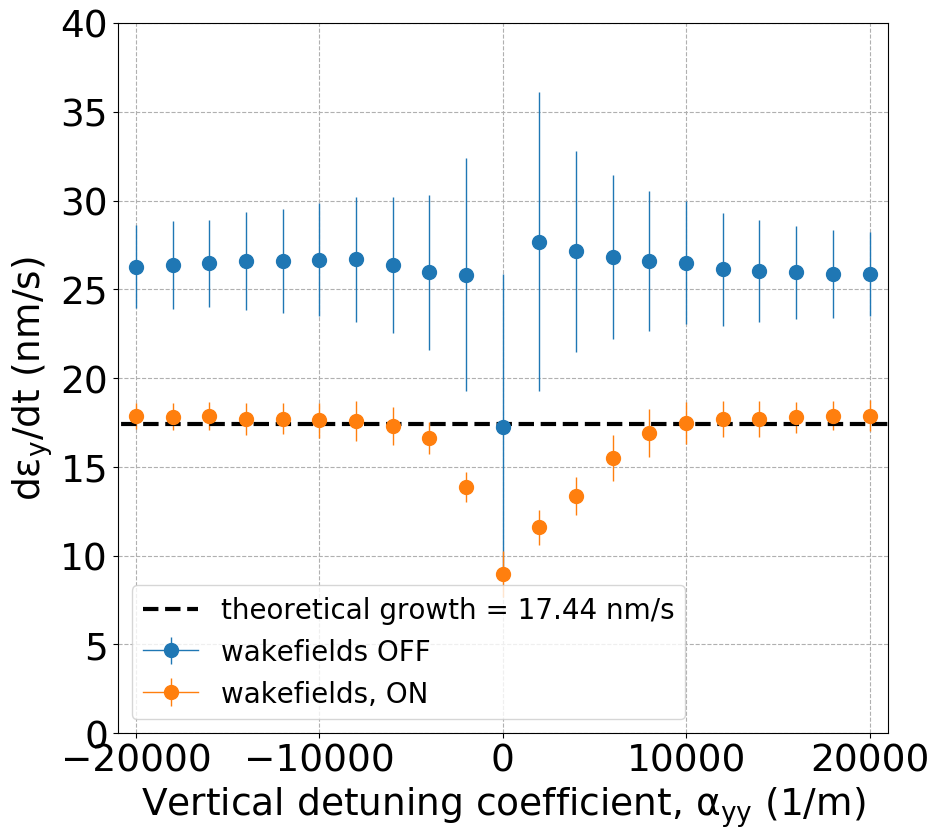

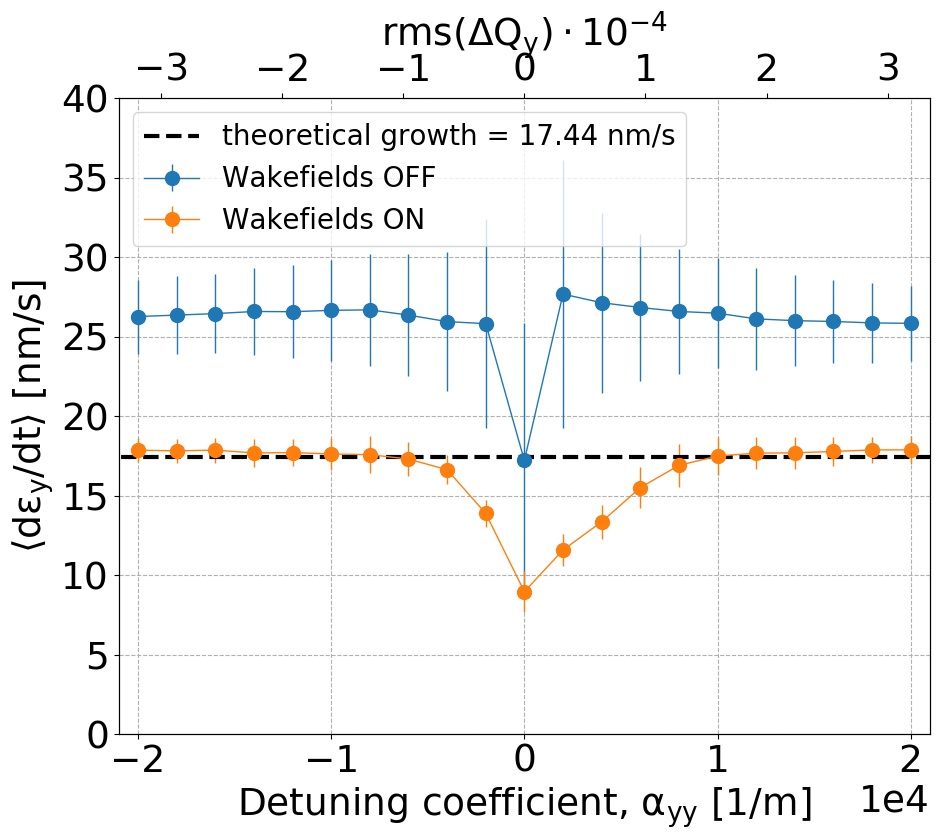

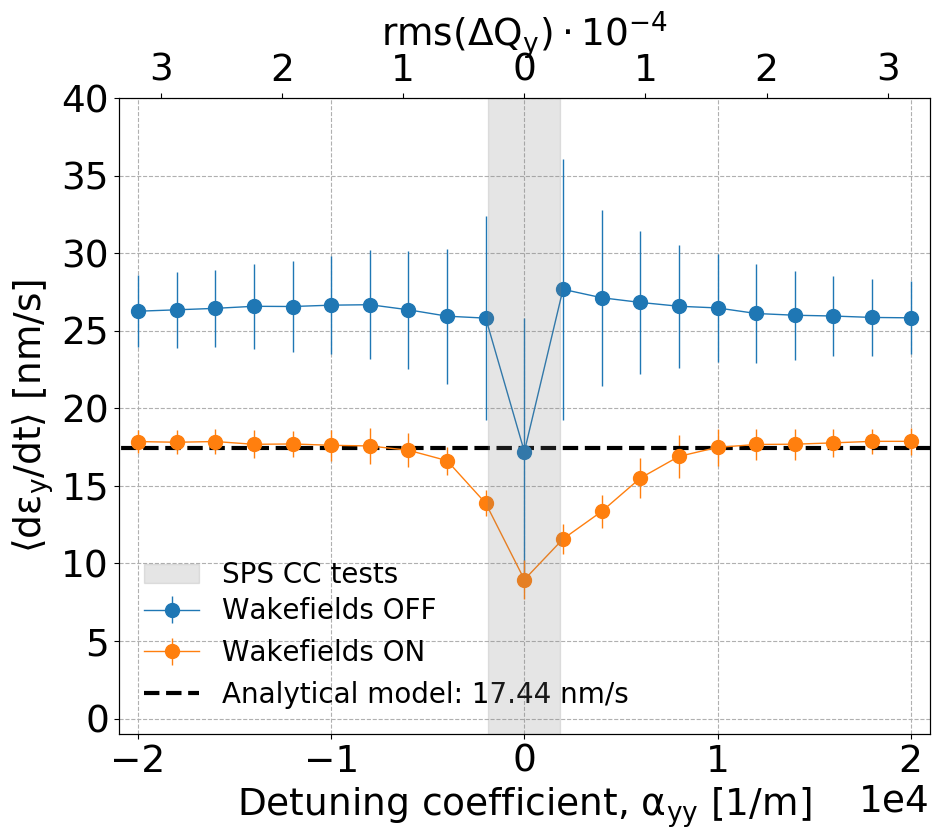

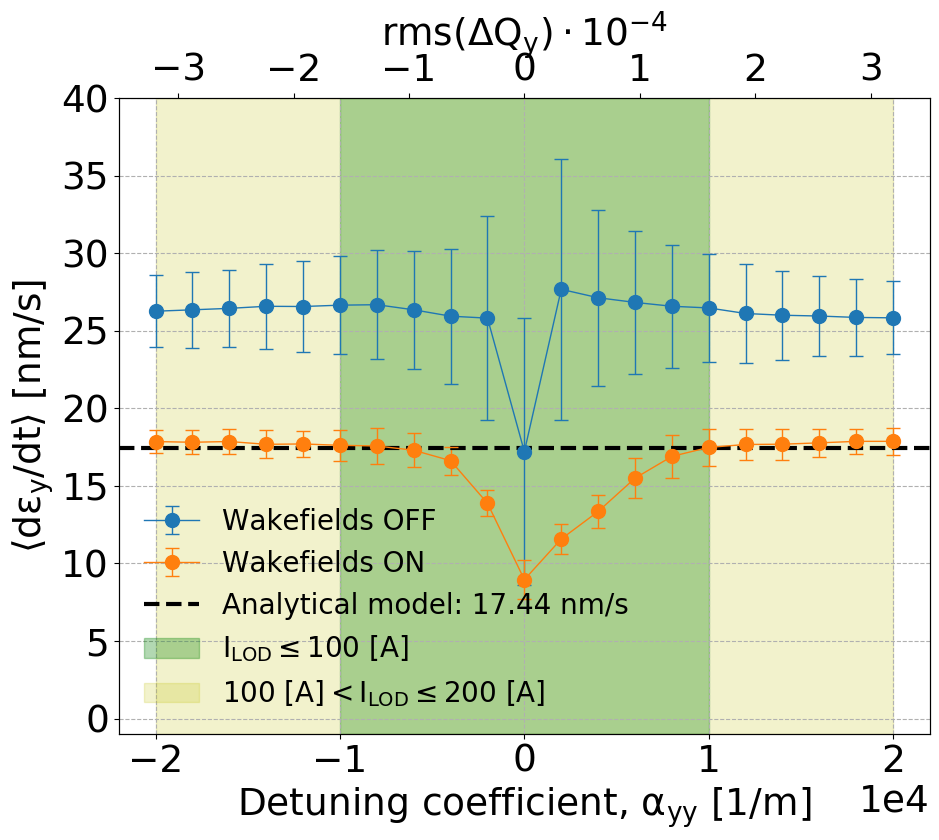

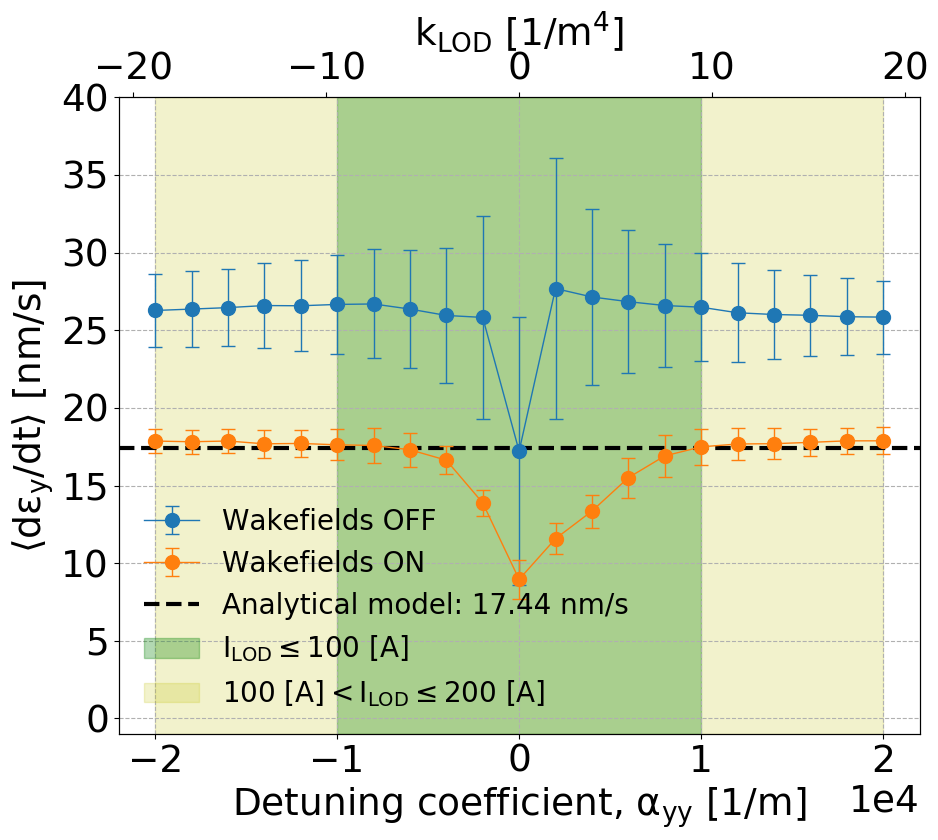

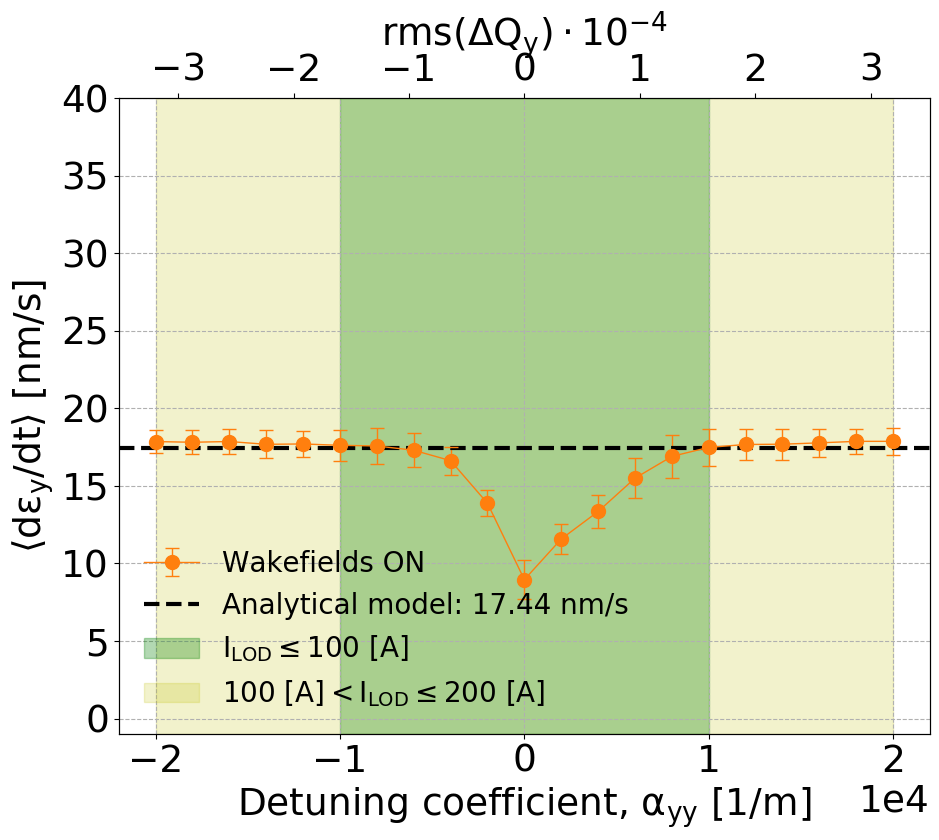

In [30]:
fig, ax = plt.subplots(1,1)

ax2 = ax.twiny()

points_wakes = []
points_no_wakes = []


for i, key in enumerate(my_df_keys):
    
    # errors for study 1
    systematic_error_1 = np.std(my_df_1[my_df_keys[i]]['m'])
    statistical_error_1 = np.sqrt(np.mean(np.array(my_df_1[my_df_keys[i]]['err'])**2))
    total_error_1 = np.sqrt(systematic_error_1**2+statistical_error_1**2)
    
    # errors for study 2
    systematic_error_2 = np.std(my_df_2[my_df_keys[i]]['m'])
    statistical_error_2 = np.sqrt(np.mean(np.array(my_df_2[my_df_keys[i]]['err'])**2))
    total_error_2 = np.sqrt(systematic_error_2**2+statistical_error_2**2)
    
    if i == 0:
        #err1 = ax.errorbar(my_variables[i], np.mean(my_df_1[my_df_keys[i]]['m'])*1e9, yerr=total_error_1*1e9, marker='o', capsize=5, c='C0', label='Wakefields OFF')
        err2 = ax.errorbar(my_variables[i], np.mean(my_df_2[my_df_keys[i]]['m'])*1e9, yerr=total_error_2*1e9, marker='o', capsize=5, c='C1', label='Wakefields ON')
    else:
        #ax.errorbar(my_variables[i], np.mean(my_df_1[my_df_keys[i]]['m'])*1e9, yerr=total_error_1*1e9, marker='o', capsize=5, c='C0')
        ax.errorbar(my_variables[i], np.mean(my_df_2[my_df_keys[i]]['m'])*1e9, yerr=total_error_2*1e9, marker='o', capsize=5, c='C1')
        
    points_no_wakes.append(np.mean(my_df_1[my_df_keys[i]]['m'])*1e9)
    points_wakes.append(np.mean(my_df_2[my_df_keys[i]]['m'])*1e9)
    
    
    ax2.plot(np.array(Dqy_rms_new[i])*1e4, np.mean(my_df_1[my_df_keys[i]]['m'])*1e9, linestyle='')
    ax2.plot(-np.array(Dqy_rms_new[i])*1e4, np.mean(my_df_1[my_df_keys[i]]['m'])*1e9, linestyle='')


#ax.plot(my_variables, points_no_wakes, c='C0')
ax.plot(my_variables, points_wakes, c='C1')
    
theory = ax.hlines(expected_growth*1e9, -22000, 22000, linestyles='dashed', linewidth=3, color='k', label=f'Analytical model: {expected_growth*1e9:.2f} nm/s')

# create colored stripes    
Ilod_1 = ax.axvspan(min(yellow_list) , max(yellow_list), alpha=0.2, color='y', label='$ \mathrm{100 \ [A] < I_{LOD} \leq 200 \ [A]}$')
Ilod_2 = ax.axvspan(min(green_list) , max(green_list), alpha=0.3, color='g', label='$\mathrm{I_{LOD} \leq 100 \ [A]}$')

# x-axis limits
ax_lim, ax2_lim = 20000, Dqy_rms[-1]*1e4
print(f'limits in primary x axis {ax_lim}')
print(f'limits in secondary x axis {ax2_lim}')

# lim +10% of the max value
ax.set_xlim(-ax_lim+(-ax_lim/10), ax_lim+ax_lim/10)
ax2.set_xticks(np.arange(-3, 4, 1))
ax2.set_xlim(-ax2_lim+(-ax2_lim/10), ax2_lim+ax2_lim/10)

# y-axis limits
ax.set_yticks(np.arange(0,45,5))
ax.set_ylim(-1, 40)


ax.grid(linestyle='dashed')

ax.set_ylabel(r'$\mathrm{\langle d\epsilon_y / dt \rangle \ [nm/s]}$')
ax.set_xlabel('Detuning coefficient, '+r'$\mathrm{\alpha_{yy} \ [1/m]}$')
ax.ticklabel_format(axis='x', style='sci', scilimits=(4,4))

ax2.set_xlabel(r'$\mathrm{rms(\Delta Q_y) \cdot 10^{-4}}$', y=15)
plt.tight_layout()


# legends
ax.legend(loc=3, frameon=False, handles=[err2, theory, Ilod_2, Ilod_1]) # for CC PN

ax2.legend(bbox_to_anchor=(0., 0.1, 0.6, 0.3), frameon=False, loc='center left') # for CC PN
#ax2.legend(bbox_to_anchor=(0., 0.01, 0.6, 0.23), frameon=False) # for dipolar noise

savefig = True
if savefig:
    plt.savefig(f'./figures/{study_name}_vs_TuneSpreadvsExpectedSPS_octupoles_Noconstraintaxy_QpxQpy1_b3b5b7.png', bbox_inches='tight')
plt.show()

In [31]:
fig, ax = plt.subplots(1,1)

ax2 = ax.twiny()

points_wakes = []
points_no_wakes = []


for i, key in enumerate(my_df_keys):
    
    # errors for study 1
    systematic_error_1 = np.std(my_df_1[my_df_keys[i]]['m'])
    statistical_error_1 = np.sqrt(np.mean(np.array(my_df_1[my_df_keys[i]]['err'])**2))
    total_error_1 = np.sqrt(systematic_error_1**2+statistical_error_1**2)
    
    # errors for study 2
    systematic_error_2 = np.std(my_df_2[my_df_keys[i]]['m'])
    statistical_error_2 = np.sqrt(np.mean(np.array(my_df_2[my_df_keys[i]]['err'])**2))
    total_error_2 = np.sqrt(systematic_error_2**2+statistical_error_2**2)
    
    if i == 0:
        #err1 = ax.errorbar(my_variables[i], np.mean(my_df_1[my_df_keys[i]]['m'])*1e9, yerr=total_error_1*1e9, marker='o', capsize=5,  c='C0', label='Wakefields OFF')
        err2 = ax.errorbar(my_variables[i], np.mean(my_df_2[my_df_keys[i]]['m'])*1e9, yerr=total_error_2*1e9, marker='o', capsize=5, c='C1', label='Wakefields ON')
    else:
        #ax.errorbar(my_variables[i], np.mean(my_df_1[my_df_keys[i]]['m'])*1e9, yerr=total_error_1*1e9, marker='o', capsize=5, c='C0')
        ax.errorbar(my_variables[i], np.mean(my_df_2[my_df_keys[i]]['m'])*1e9, yerr=total_error_2*1e9, marker='o', capsize=5, c='C1')
        
    points_no_wakes.append(np.mean(my_df_1[my_df_keys[i]]['m'])*1e9)
    points_wakes.append(np.mean(my_df_2[my_df_keys[i]]['m'])*1e9)
    
    ax2.plot(octupole_settings['klod [1/m^4]'][i], np.mean(my_df_1[my_df_keys[i]]['m'])*1e9)
    

#ax.plot(my_variables, points_no_wakes, c='C0')
ax.plot(my_variables, points_wakes, c='C1')
    
theory = ax.hlines(expected_growth*1e9, -22000, 22000, linestyles='dashed', linewidth=3, color='k', label=f'Analytical model: {expected_growth*1e9:.2f} nm/s')


# create colored stripes
Ilod_1 = ax.axvspan(min(yellow_list) , max(yellow_list), alpha=0.2, color='y', label='$ \mathrm{100 \ [A] < I_{LOD} \leq 200 \ [A]}$')
Ilod_2 = ax.axvspan(min(green_list) , max(green_list), alpha=0.3, color='g', label='$\mathrm{I_{LOD} \leq 100 \ [A]}$')

# x-axis limits
ax_lim, ax2_lim = 20000, list(octupole_settings['klod [1/m^4]'])[-1]
print(ax_lim, ax2_lim)
# lim +10% of the max value
ax.set_xlim(-ax_lim+(-ax_lim/10), ax_lim+ax_lim/10)
ax2.set_xlim(-ax2_lim+(-ax2_lim/10), ax2_lim+ax2_lim/10)

# y-axis limits
ax.set_yticks(np.arange(0,45,5))
ax.set_ylim(-1, 40)

ax.grid(linestyle='dashed')

ax.set_ylabel(r'$\mathrm{\langle d\epsilon_y / dt \rangle \ [nm/s]}$')
ax.set_xlabel('Detuning coefficient, '+r'$\mathrm{\alpha_{yy} \ [1/m]}$')
ax.ticklabel_format(axis='x', style='sci', scilimits=(4,4))

ax2.set_xlabel(r'$\mathrm{k_{LOD} \ [1/m^4]}$', y=15)
plt.tight_layout()


# legends
ax.legend(loc=3, frameon=False, handles=[err2, theory, Ilod_2, Ilod_1]) # for CC PN

ax2.legend(bbox_to_anchor=(0., 0.1, 0.6, 0.3), frameon=False, loc='center left') # for CC PN
#ax2.legend(bbox_to_anchor=(0., 0.01, 0.6, 0.23), frameon=False) # for dipolar noise

savefig = False
if savefig:
    plt.savefig(f'./figures/{study_name}_vs_TuneSpreadvsExpectedSPS_octupoles_Noconstraintaxy_QpxQpy1_b3b5b7_KLOF.png', bbox_inches='tight')

20000 18.86782947042668


No handles with labels found to put in legend.


## Part C:  Octupole settings

### IPAC style paper

In [33]:
params = {'legend.fontsize': 30,
          'figure.figsize': (9.5, 8.5),
          'axes.labelsize': 30,
          'axes.titlesize': 30,
          'xtick.labelsize': 30,
          'ytick.labelsize': 30,
          'image.cmap': 'jet',
          'lines.linewidth': 1,
          'lines.markersize': 12,
          'font.family': 'sans-serif'}

plt.rc('text', usetex=False)
plt.rc('font', family='serif')
plt.rcParams.update(params)

No handles with labels found to put in legend.


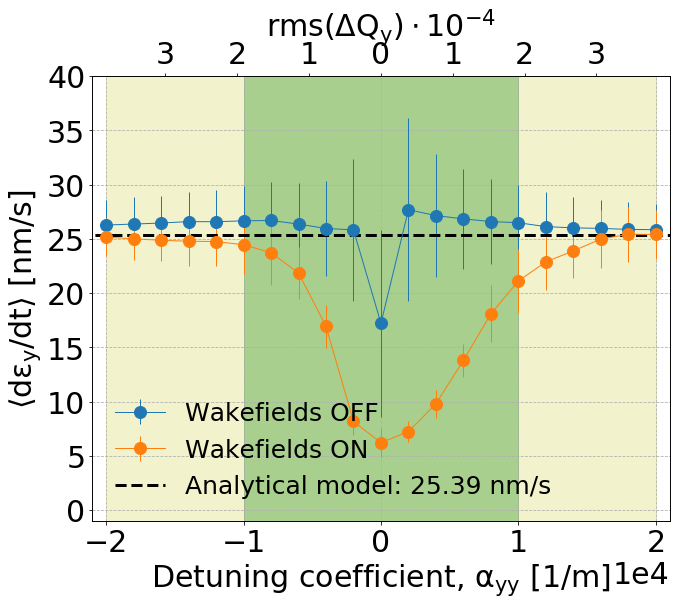

In [34]:
fig, ax = plt.subplots(1,1)

ax2 = ax.twiny()

points_wakes = []
points_no_wakes = []


for i, key in enumerate(my_df_keys):
    
    # errors for study 1
    systematic_error_1 = np.std(my_df_1[my_df_keys[i]]['m'])
    statistical_error_1 = np.sqrt(np.mean(np.array(my_df_1[my_df_keys[i]]['err'])**2))
    total_error_1 = np.sqrt(systematic_error_1**2+statistical_error_1**2)
    
    # errors for study 2
    systematic_error_2 = np.std(my_df_2[my_df_keys[i]]['m'])
    statistical_error_2 = np.sqrt(np.mean(np.array(my_df_2[my_df_keys[i]]['err'])**2))
    total_error_2 = np.sqrt(systematic_error_2**2+statistical_error_2**2)
    
    if i == 0:
        err1 = ax.errorbar(my_variables[i], np.mean(my_df_1[my_df_keys[i]]['m'])*1e9, yerr=total_error_1*1e9, marker='o',  c='C0', label='Wakefields OFF')
        err2 = ax.errorbar(my_variables[i], np.mean(my_df_2[my_df_keys[i]]['m'])*1e9, yerr=total_error_2*1e9, marker='o',  c='C1', label='Wakefields ON')
    else:
        ax.errorbar(my_variables[i], np.mean(my_df_1[my_df_keys[i]]['m'])*1e9, yerr=total_error_1*1e9, marker='o',  c='C0')
        ax.errorbar(my_variables[i], np.mean(my_df_2[my_df_keys[i]]['m'])*1e9, yerr=total_error_2*1e9, marker='o',  c='C1')
        
    points_no_wakes.append(np.mean(my_df_1[my_df_keys[i]]['m'])*1e9)
    points_wakes.append(np.mean(my_df_2[my_df_keys[i]]['m'])*1e9)
    
    ax2.plot(np.array(Dqy_rms_new[i])*1e4, np.mean(my_df_1[my_df_keys[i]]['m'])*1e9, linestyle='')
    ax2.plot(-np.array(Dqy_rms_new[i])*1e4, np.mean(my_df_1[my_df_keys[i]]['m'])*1e9, linestyle='')


ax.plot(my_variables, points_no_wakes, c='C0')
ax.plot(my_variables, points_wakes, c='C1')
    
theory = ax.hlines(expected_growth*1e9, -22000, 22000, linestyles='dashed', linewidth=3, color='k', label=f'Analytical model: {expected_growth*1e9:.2f} nm/s')

#ax2.set_xlim(-np.max(Dqy_rms_new)-21000*2*rms_Jy_init*1e4, np.max(Dqy_rms_new)+21000*2*rms_Jy_init*1e4 )
ax.set_xlim(-21000, 21000)

# create colored stripes

    
#ax2.axvspan(-Dqy_rms_sps*1e4 , Dqy_rms_sps*1e4, alpha=0.2, color='grey', label='SPS CC tests')

#ax.axvspan(min(red_list) , max(red_list), alpha=0.1, color='r', label='SPS CC tests')
ax.axvspan(min(yellow_list) , max(yellow_list), alpha=0.2, color='y', label='SPS CC tests')
ax.axvspan(min(green_list) , max(green_list), alpha=0.3, color='g', label='SPS CC tests')


labels = ax.get_xticks()


ax.set_yticks(np.arange(0,45,5))
ax2.set_xticks(np.arange(-3, 4,1))
ax2.set_xticklabels(np.abs((np.arange(-3, 4,1))))

ax.set_ylim(-1, 40)

ax.grid(linestyle='dashed')

ax.set_ylabel(r'$\mathrm{\langle d\epsilon_y / dt \rangle \ [nm/s]}$')
ax.set_xlabel('Detuning coefficient, '+r'$\mathrm{\alpha_{yy} \ [1/m]}$')
ax.ticklabel_format(axis='x', style='sci', scilimits=(4,4))

ax2.set_xlabel(r'$\mathrm{rms(\Delta Q_y) \cdot 10^{-4}}$', y=15)
plt.tight_layout()


# legends
ax.legend(loc=3, frameon=False, handles=[err1, err2, theory], fontsize=25) # for CC PN
#ax.legend(loc=3, frameon=False, handles=[err1, err2]) # for dipolar noise

ax2.legend(bbox_to_anchor=(0., 0.165, 0.6, 0.3), frameon=False, fontsize=25,  loc='center left') # for CC PN
#ax2.legend(bbox_to_anchor=(0., 0.01, 0.6, 0.23), frameon=False) # for dipolar noise

savefig = False
if savefig:
    plt.savefig(f'./figures/{study_name}_vs_TuneSpreadvsExpectedSPS_IPAC.png', bbox_inches='tight')

### IPAC style poster/presentation

In [21]:
params = {'legend.fontsize': 30,
          'figure.figsize': (9.5, 8.5),
          'axes.labelsize': 30,
          'axes.titlesize': 30,
          'xtick.labelsize': 30,
          'ytick.labelsize': 30,
          'image.cmap': 'jet',
          'lines.linewidth': 1,
          'lines.markersize': 12,
          'font.family': 'sans-serif'}

plt.rc('text', usetex=False)
plt.rc('font', family='serif')
plt.rcParams.update(params)

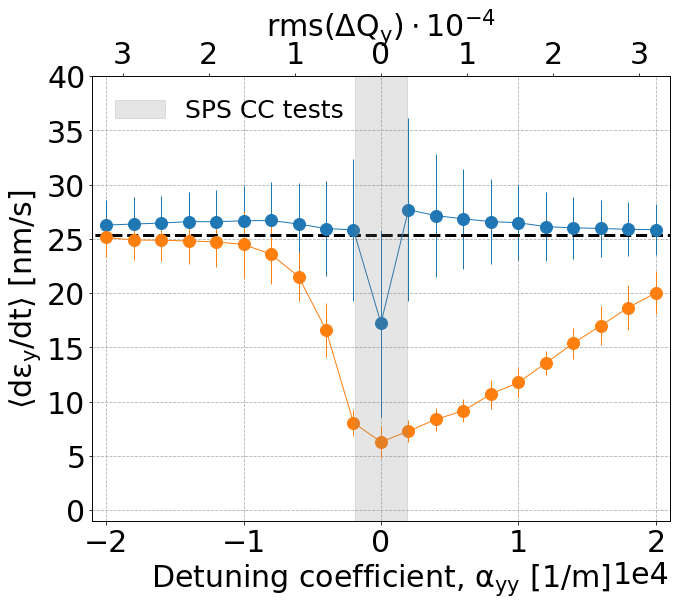

In [38]:
fig, ax = plt.subplots(1,1)

ax2 = ax.twiny()

points_wakes = []
points_no_wakes = []


for i, key in enumerate(my_df_keys):
    
    # errors for study 1
    systematic_error_1 = np.std(my_df_1[my_df_keys[i]]['m'])
    statistical_error_1 = np.sqrt(np.mean(np.array(my_df_1[my_df_keys[i]]['err'])**2))
    total_error_1 = np.sqrt(systematic_error_1**2+statistical_error_1**2)
    
    # errors for study 2
    systematic_error_2 = np.std(my_df_2[my_df_keys[i]]['m'])
    statistical_error_2 = np.sqrt(np.mean(np.array(my_df_2[my_df_keys[i]]['err'])**2))
    total_error_2 = np.sqrt(systematic_error_2**2+statistical_error_2**2)
    
    if i == 0:
        err1 = ax.errorbar(my_variables[i], np.mean(my_df_1[my_df_keys[i]]['m'])*1e9, yerr=total_error_1*1e9, marker='o',  c='C0', label='Wakefields OFF')
        err2 = ax.errorbar(my_variables[i], np.mean(my_df_2[my_df_keys[i]]['m'])*1e9, yerr=total_error_2*1e9, marker='o',  c='C1', label='Wakefields ON')
    else:
        ax.errorbar(my_variables[i], np.mean(my_df_1[my_df_keys[i]]['m'])*1e9, yerr=total_error_1*1e9, marker='o',  c='C0')
        ax.errorbar(my_variables[i], np.mean(my_df_2[my_df_keys[i]]['m'])*1e9, yerr=total_error_2*1e9, marker='o',  c='C1')
        
    points_no_wakes.append(np.mean(my_df_1[my_df_keys[i]]['m'])*1e9)
    points_wakes.append(np.mean(my_df_2[my_df_keys[i]]['m'])*1e9)
    
    
    ax2.plot(np.array(Dqy_rms[i])*1e4, np.mean(my_df_1[my_df_keys[i]]['m'])*1e9, linestyle='')
    ax2.plot(-np.array(Dqy_rms[i])*1e4, np.mean(my_df_1[my_df_keys[i]]['m'])*1e9, linestyle='')


ax.plot(my_variables, points_no_wakes, c='C0')
ax.plot(my_variables, points_wakes, c='C1')
    
theory = ax.hlines(expected_growth*1e9, -22000, 22000, linestyles='dashed', linewidth=3, color='k', label=f'Analytical model: {expected_growth*1e9:.2f} nm/s')

ax2.set_xlim(-np.max(Dqy_rms)-21000*2*rms_Jy_init*1e4, np.max(Dqy_rms)+21000*2*rms_Jy_init*1e4 )
ax.set_xlim(-21000, 21000)

ax2.axvspan(-Dqy_rms_sps*1e4 , Dqy_rms_sps*1e4, alpha=0.2, color='grey', label='SPS CC tests')

ax2.set_xlim(-np.max(Dqy_rms)-21000*2*rms_Jy_init*1e4, np.max(Dqy_rms)+21000*2*rms_Jy_init*1e4 )


labels = ax.get_xticks()


ax.set_yticks(np.arange(0,45,5))
ax2.set_xticks(np.arange(-3, 4,1))
ax2.set_xticklabels(np.abs((np.arange(-3, 4,1))))


ax.set_ylim(-1, 40)

ax.grid(linestyle='dashed')

ax.set_ylabel(r'$\mathrm{\langle d\epsilon_y / dt \rangle \ [nm/s]}$')
ax.set_xlabel('Detuning coefficient, '+r'$\mathrm{\alpha_{yy} \ [1/m]}$')
ax.ticklabel_format(axis='x', style='sci', scilimits=(4,4))

ax2.set_xlabel(r'$\mathrm{rms(\Delta Q_y) \cdot 10^{-4}}$', y=15)
plt.tight_layout()


# legends
#ax.legend(loc=3, frameon=False, handles=[err1, err2, theory], fontsize=25) # for CC PN
#ax.legend(loc=3, frameon=False, handles=[err1, err2]) # for dipolar noise

#ax2.legend(bbox_to_anchor=(0., 0.165, 0.6, 0.3), frameon=False, fontsize=25,  loc='center left') # for CC PN
ax2.legend(frameon=False, fontsize=25, loc=2)
#ax2.legend(bbox_to_anchor=(0., 0.01, 0.6, 0.23), frameon=False) # for dipolar noise

savefig = False
if savefig:
    plt.savefig(f'./figures/{study_name}_vs_TuneSpreadvsExpectedSPS_theory_and_wakesOFF_and_wakesON.png', bbox_inches='tight')

In [25]:
np.mean(my_df_1['ayy_2000.0']['m'])*1e9

28.53868040574884

In [26]:
np.mean(my_df_2['ayy_2000.0']['m'])*1e9

6.099808757994768